In [3]:
!pip install tensorflow

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_dir_train = pathlib.Path('C:\\Users\\SkinCancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train')
data_dir_test = pathlib.Path('C:\\Users\\SkinCancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')


In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [20]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


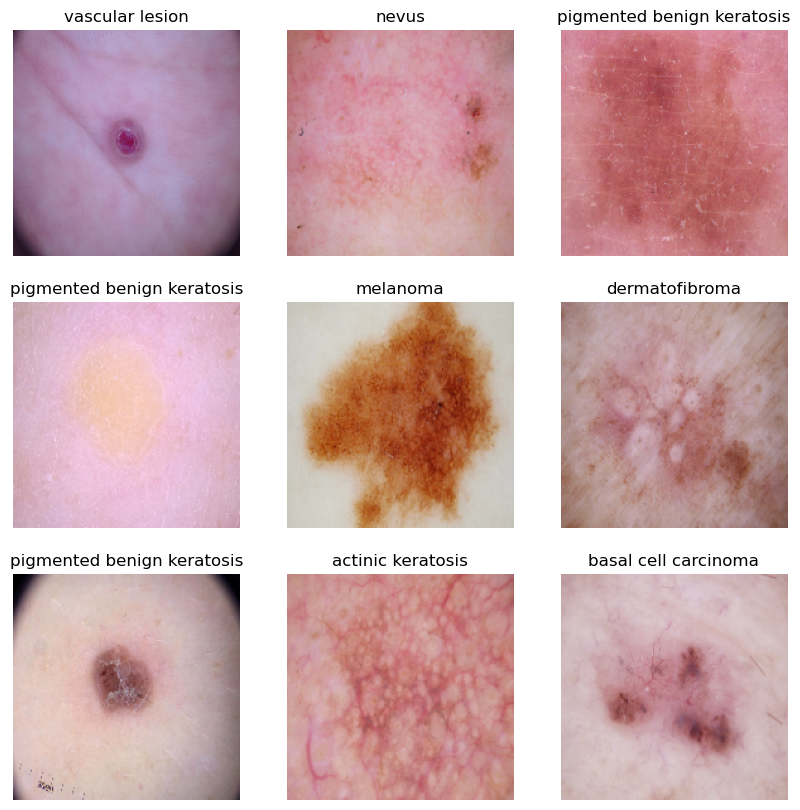

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [28]:
from tensorflow.keras import layers

# Define the input layer with shape (img_height, img_width, 3)
input_layer = keras.Input(shape=(img_height, img_width, 3))

# Add data augmentation as part of the model
x = data_augmentation(input_layer)

# Continue building the rest of your model layers here...

In [30]:
from keras import layers, Sequential

num_classes = 9  # As target class has 9 labels
img_height, img_width = 180, 180  # Adjust these as needed

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # No 'experimental' prefix
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure to specify activation for output layer
])

# Continue with model compilation and training as needed


C:\Users\Rupsha\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\Rupsha\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 59s 718ms/step - accuracy: 0.1927 - loss: 2.1054 - val_accuracy: 0.3311 - val_loss: 1.7204
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 649ms/step - accuracy: 0.3757 - loss: 1.7372 - val_accuracy: 0.4072 - val_loss: 1.7109
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 604ms/step - accuracy: 0.4541 - loss: 1.5215 - val_accuracy: 0.5145 - val_loss: 1.3905
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 605ms/step - accuracy: 0.5148 - loss: 1.4023 - val_accuracy: 0.5369 - val_loss: 1.3780
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 873ms/step - accuracy: 0.5560 - loss: 1.2446 - val_accuracy: 0.5436 - val_loss: 1.4148
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 445ms/step - accuracy: 0.5908 - loss: 1.1212 - val_accuracy: 0.5503 - val_loss: 1.3952
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.6232 - loss: 1.0638 - val_accuracy: 0.4855 - val_loss: 1.6732
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 659ms/step - accuracy: 0.6622 - loss: 0.9362 - val_accuracy: 0.521

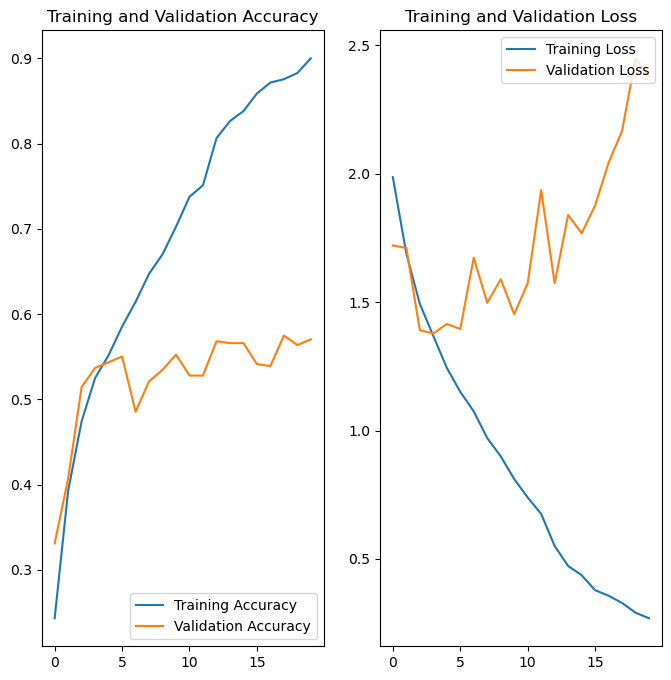

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

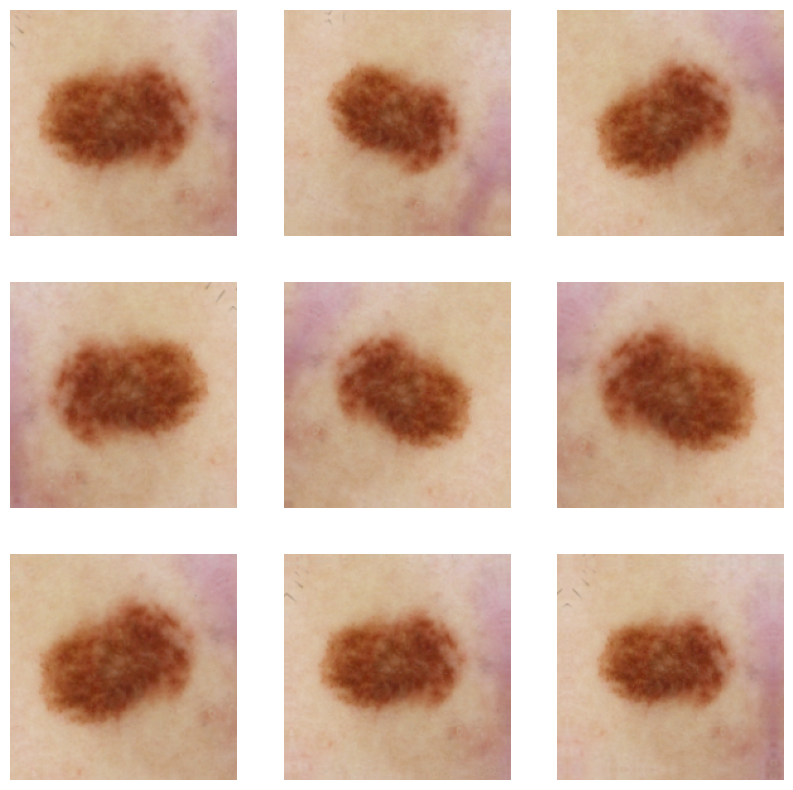

In [42]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [50]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from tensorflow import keras
from tensorflow.keras import layers, Sequential

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='softmax'),
    layers.Dense(num_classes)
])

In [52]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 802ms/step - accuracy: 0.2027 - loss: 2.1506 - val_accuracy: 0.1924 - val_loss: 2.1170
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 781ms/step - accuracy: 0.2228 - loss: 2.0940 - val_accuracy: 0.2058 - val_loss: 2.0914
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 792ms/step - accuracy: 0.2038 - loss: 2.0770 - val_accuracy: 0.2058 - val_loss: 2.0728
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - accuracy: 0.1926 - loss: 2.0569 - val_accuracy: 0.2058 - val_loss: 2.0583
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 864ms/step - accuracy: 0.2027 - loss: 2.0506 - val_accuracy: 0.2058 - val_loss: 2.0489
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 78s 787ms/step - accuracy: 0.2167 - loss: 2.0251 - val_accuracy: 0.2058 - val_loss: 2.0418
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 800ms/step - accuracy: 0.2191 - loss: 2.0342 - val_accuracy: 0.2058 - val_loss: 2.0365
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 799ms/step - accuracy: 0.2192 - loss: 2.0284 - val_accu

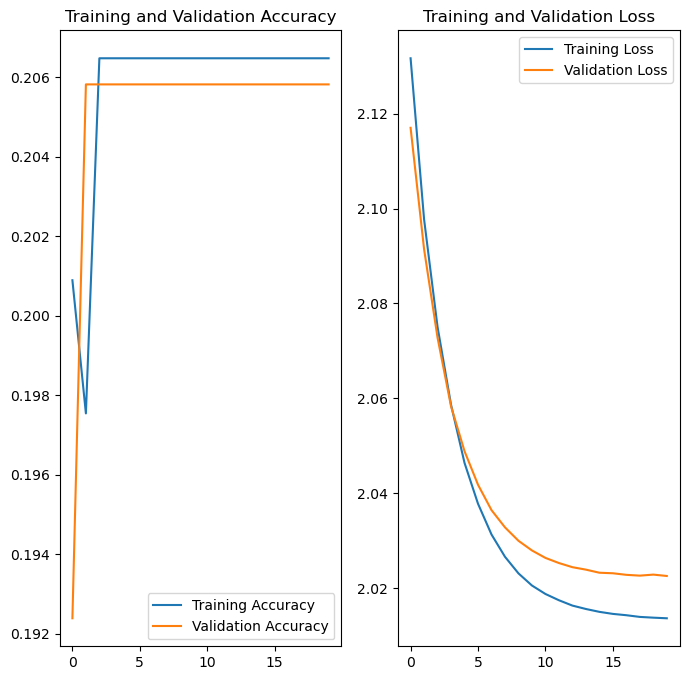

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:

## Your code goes here.

from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [61]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('C:\\Users\\SkinCancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\SkinCancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [63]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,C:\Users\SkinCancer\Skin cancer ISIC The Inter...,actinic keratosis
1,C:\Users\SkinCancer\Skin cancer ISIC The Inter...,actinic keratosis
2,C:\Users\SkinCancer\Skin cancer ISIC The Inter...,actinic keratosis
3,C:\Users\SkinCancer\Skin cancer ISIC The Inter...,actinic keratosis
4,C:\Users\SkinCancer\Skin cancer ISIC The Inter...,actinic keratosis


In [65]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [67]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
Name: proportion, dtype: float64

In [69]:
!pip install Augmentor

In [71]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Insufficient rights to read or write output directory (C:\Users\SkinCancer\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output)
Initialised with 114 image(s) found.
Output directory set to C:\Users\SkinCancer\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:01<?, ? Samples/s]
C:\Users\Rupsha\anaconda3\Lib\site-packages\Augmentor\Pipeline.py:1086: SyntaxWarning: invalid escape sequence '\B'
  """


AttributeError: 'FileNotFoundError' object has no attribute 'message'

In [ ]:
data_dir_train = 'path/to/your/training/data'
path_to_training_dataset = str(data_dir_train) + '/
print(str(data_dir_train))